Jialu Part 1

## 7. term spread

Yield difference between 10-year and 3-month Treasury
https://www.quandl.com/data/USTREASURY/YIELD-Treasury-Yield-Curve-Rates

In [2]:
import pandas as pd
import numpy as np
treasury=pd.read_csv('raw_data/USTREASURY-YIELD.csv')

In [5]:
treasury=treasury[treasury['Date']>='1990-06-08']

In [29]:
treasury=treasury.sort_values(by='Date',ascending=True)

In [399]:
treasury['TERM']=treasury['10 YR']-treasury['3 MO']
treasury.set_index('Date')['TERM'].to_pickle('TERM.pkl')

## 8. cointegration residual

https://www.quandl.com/data/UNAC/ECE_USA-Individual-Consumption-Expenditure-of-Households-NPISHs-and-General-Government-at-Current-Prices-United-States-of-America

https://www.quandl.com/data/FED/FU156010001_Q-Households-and-nonprofit-organizations-personal-income-Quarterly-Transactions-NSA

https://www.quandl.com/data/FRED/HNOTLNQ027S-Households-and-nonprofit-organizations-total-liabilities-and-net-worth-IMA-Level

The consumption data are for nondurables and services excluding shoes
and clothing, in 1992 chain weighted dollars. The asset holdings data is the
household net worth series provided by the Board of Governors of the Federal
Reserve. Labor income is defined as wages and salaries plus transfer
payments plus other labor income minus personal contributions for social
insurance minus taxes. Taxes are defined as (wages and salaries/(wages and
salaries + proprietors income with IVA and Ccadj + rental income + personal
dividends + personal interest income)) * (personal tax and non-tax
payments), where IVA is inventory evaluation and Ccadj is capital consumption
adjustments. Both the net worth variable and the labor income variable
are deflated by the PCE chain-type price deflator, 1992 = 100. Our source
for all of the consumption and income components, as well as the PCE deflator,
is the U.S. Department of Commerce, Bureau of Economic Analysis.
Note that, although there is some back-casting of the consumption and income
data due to revisions and interpolated estimation by the Bureau of
Economic Analysis of some service expenditure components, no information
about future stock returns is being used to alter any of the data used to
construct cry.

In [325]:
consumption=pd.read_csv('raw_data/UNAC-ECE_USA.csv')
asset=pd.read_csv('raw_data/FRED-HNOTLNQ027S.csv')
wealth=pd.read_csv('raw_data/FED-FU156010001_Q.csv')

In [327]:
consumption['consumption']=consumption['Equals: Total actual individual consumption (US dollar; series 1000)']-consumption['Clothing and footwear (US dollar; series 1000)']
consumption=consumption[['Date','consumption']]

In [328]:
asset=asset.rename(columns={'Value':'asset'})
wealth=wealth.rename(columns={'Value':'wealth'})
data=pd.merge(consumption,asset,on='Date',how='outer')
data=pd.merge(data,wealth,on='Date',how='outer')

In [329]:
#CPI adjustion to 1992 price:141.900
CPI=pd.read_csv('raw_data/RATEINF-CPI_USA.csv')
CPI=CPI.rename(columns={'Value':'CPI'})

In [330]:
data=data[data.Date>='1989-12-01']
CPI=CPI[CPI.Date>='1989-12-01']
data=pd.merge(data,CPI,on='Date',how='outer')

In [331]:
data['consumption']=data['consumption']/data['CPI']*141.900
data['asset']=data['asset']/data['CPI']*141.900
data['wealth']=data['wealth']/data['CPI']*141.900

In [332]:
#interpolate yearly consumption to quarterly data
data=data.sort_values(by='Date')
data

,Date,consumption,asset,wealth,CPI
28,1989-12-31,4.175202e+12,2.857515e+07,1.326765e+06,126.100
118,1990-03-31,NaN,2.821462e+07,1.326724e+06,128.700
117,1990-06-30,NaN,2.829350e+07,1.335140e+06,129.900
116,1990-09-30,NaN,2.758460e+07,1.323467e+06,132.700
27,1990-12-31,4.207845e+12,2.789541e+07,1.318484e+06,133.800
115,1991-03-31,NaN,2.829596e+07,1.309632e+06,135.000
114,1991-06-30,NaN,2.820423e+07,1.315439e+06,136.000
113,1991-09-30,NaN,2.828584e+07,1.317042e+06,137.200
26,1991-12-31,4.242540e+12,2.883105e+07,1.330785e+06,137.900
112,1992-03-31,NaN,2.865285e+07,1.347226e+06,139.300


In [350]:
data['consumption']=data['consumption'].ffill()
data['asset']=data['asset'].ffill()
data['wealth']=data['wealth'].ffill()

In [342]:
#log,detrend and cointegration
data['consumption']=np.log(data['consumption'])
data['asset']=np.log(data['asset'])
data['wealth']=np.log(data['wealth'])
data=data.set_index('Date')

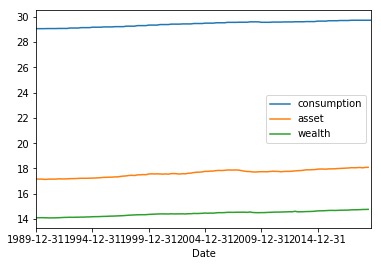

In [344]:
#linear trend
data[['consumption','asset','wealth']].plot()

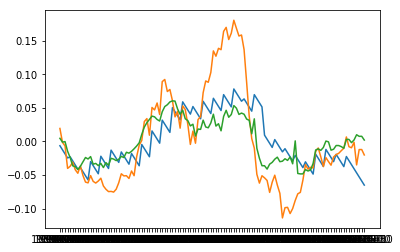

In [367]:
#detrend
from scipy import signal
data['consumption_norm']=signal.detrend(data['consumption'],type='linear')
data['asset_norm']=signal.detrend(data['asset'],type='linear')
data['wealth_norm']=signal.detrend(data['wealth'],type='linear')
plt.plot(data['consumption_norm'])
plt.plot(data['asset_norm'])
plt.plot(data['wealth_norm'])

In [358]:
from statsmodels.tsa.stattools import coint
coint(data['consumption'], data[['asset','wealth']], trend='ct')

(-1.786144228189179,
 0.930043550501913,
 array([-4.82422535, -4.22013247, -3.91192733]))

In [371]:
import statsmodels.api as sm
model = sm.OLS(data['consumption'], sm.add_constant(data[['asset','wealth']]))
results = model.fit()

C:\Users\xjl05\AppData\Local\conda\conda\envs\python36\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [375]:
data['resid']=results.resid

In [378]:
data['resid'].to_pickle('CAY.pkl')

## 9. VIX-vol forecast

https://finance.yahoo.com/quote/%5EGSPC/history/

https://finance.yahoo.com/quote/%5EVIX/history?period1=644817600&period2=1573102800&interval=1d&filter=history&frequency=1d

In [383]:
sp500=pd.read_csv('raw_data/^GSPC.csv')
vix=pd.read_csv('raw_data/^VIX.csv')

In [384]:
#implement Yang and Zhang's estimator
import numpy as np
sp500['o']=np.log(sp500['Open'])-np.log(sp500['Close'].shift(1))
sp500['u']=np.log(sp500['High'])-np.log(sp500['Open'])
sp500['d']=np.log(sp500['Low'])-np.log(sp500['Open'])
sp500['c']=np.log(sp500['Close'])-np.log(sp500['Open'])

In [385]:
#suppose n=20
n=20
sp500['rs']=sp500['u']*(sp500['u']-sp500['c'])+sp500['d']*(sp500['d']-sp500['c'])
sp500['V_rs']=sp500['rs'].rolling(window=n).sum()/n
series_vo=(sp500['o']-sp500['o'].rolling(window=n).mean())**2
sp500['V_o']=series_vo.rolling(window=n).sum()/(n-1)
series_vc=(sp500['c']-sp500['c'].rolling(window=20).mean())**2
sp500['V_c']=series_vc.rolling(window=n).sum()/(n-1)

k=0.34/(1.34+(n+1)/(n-1))
sp500['V']=sp500['V_o']+k*sp500['V_c']+(1-k)*sp500['V_rs']

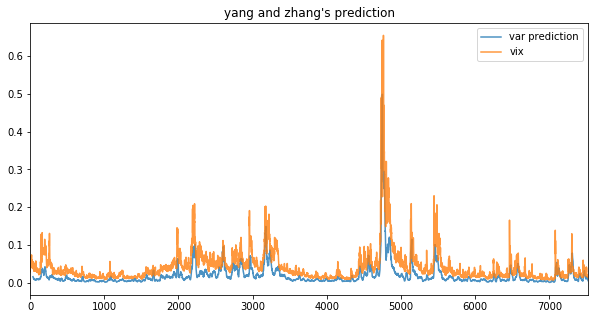

In [386]:
plt.figure(figsize=(10,5))
(252*sp500['V']).plot(alpha=0.8)
((vix.Close/100)**2).plot(alpha=0.8)
plt.legend(['var prediction','vix'])
plt.title('yang and zhang\'s prediction')
plt.show()

In [387]:
#GARCH style, actually is ARMA to variance
from statsmodels.tsa.arima_model import ARMA
model=ARMA(sp500['V'][39:],order=(1,1)).fit()

In [388]:
model.predict()

78      0.000037
79      0.000036
80      0.000036
81      0.000037
82      0.000039
83      0.000039
84      0.000035
85      0.000035
86      0.000035
87      0.000034
88      0.000034
89      0.000034
90      0.000034
91      0.000035
92      0.000040
93      0.000045
94      0.000042
95      0.000041
96      0.000043
97      0.000039
98      0.000041
99      0.000041
100     0.000041
101     0.000040
102     0.000039
103     0.000038
104     0.000039
105     0.000039
106     0.000037
107     0.000039
          ...   
7492    0.000044
7493    0.000043
7494    0.000043
7495    0.000041
7496    0.000041
7497    0.000046
7498    0.000053
7499    0.000053
7500    0.000054
7501    0.000054
7502    0.000057
7503    0.000058
7504    0.000065
7505    0.000061
7506    0.000064
7507    0.000059
7508    0.000061
7509    0.000060
7510    0.000059
7511    0.000054
7512    0.000052
7513    0.000052
7514    0.000048
7515    0.000049
7516    0.000045
7517    0.000040
7518    0.000032
7519    0.0000

In [389]:
vix=vix.iloc[78:]
vix['forecast']=np.sqrt(model.predict()*252)*100

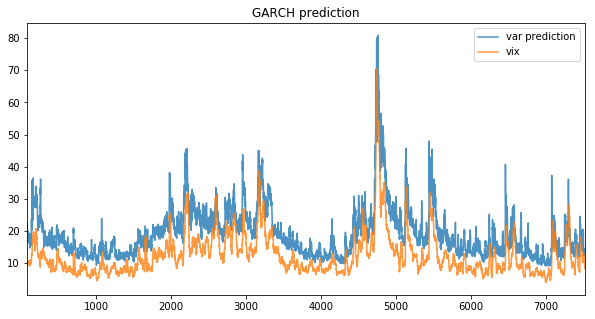

In [390]:
plt.figure(figsize=(10,5))
vix['Close'].plot(alpha=0.8)
vix['forecast'].plot(alpha=0.8)
plt.legend(['var prediction','vix'])
plt.title('GARCH prediction')
plt.show()

In [391]:
vix['VRP']=vix['Close']-vix['forecast']
vix=vix[(vix['Date']>='1990-06-08')&(vix['Date']<='2019-11-05')]
vix=vix.set_index('Date')
vix['VRP'].to_pickle('VRP.pkl')

## 10. Implied correlation

http://www.cboe.com/publish/scheduledtask/mktdata/datahouse/implied_correlation_hist.csv

Choose the first available IC for each date.

from 20070103-20191105

In [138]:
IC1=pd.read_csv('raw_data/implied_correlation_hist.csv',skiprows=1)

In [139]:
del IC1['SPX']
del IC1['VIX']
IC1['DATE']=pd.to_datetime(IC1['DATE']).astype(str)
IC1=IC1[IC1.DATE<='2019-11-05']
IC1=IC1.set_index('DATE')

In [140]:
def firstIC(row):
    for i in row:
        try:
            if(np.isnan(i)):
                continue
            else:
                return i
        except:
            return
IC1['IC']=IC1.apply(firstIC,axis=1)

In [142]:
IC1['IC'].to_pickle('IC.pkl')

## 11. Baltic dry index

https://www.investing.com/indices/baltic-dry-historical-data

In [9]:
BDI1=pd.read_csv('raw_data/Baltic Dry Index Historical Data.csv')#20120704-20191001

In [6]:
BDI2=pd.read_csv('raw_data/equity_mkt_timing_2018/BDI_GSCI.csv')

In [22]:
BDI2['Date']=pd.to_datetime(BDI2['Name']).astype(str)
BDI2=BDI2[(BDI2['Date']>='1990-06-08')&(BDI2['Date']<'2012-07-04')]
BDI2=BDI2.rename(columns={'Baltic Exchange Dry Index (BDI) - PRICE INDEX':'BDI'})
BDI1=BDI1.rename(columns={'Price':'BDI'})

In [25]:
BDI2=BDI2.sort_values(by='Date',ascending=True).set_index('Date')['BDI']
BDI1=BDI1.sort_values(by='Date',ascending=True).set_index('Date')['BDI']

In [48]:
BDI1=BDI1.apply(lambda x: float(x.replace(',','')))
BDI=pd.concat([BDI1,BDI2])

In [50]:
BDI.to_pickle('BDI.pkl')